# Correlation Between Social Environments

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline

## Parameters 

In [2]:
EV_SALE_DATASET = '../Processed_Data/Ev_sales_per_capita.csv'
CLIMATE_DATASET = '../Processed_Data/climate_state.csv'
INCOME_DATASET = '../Processed_Data/incomes.csv'
TAX_DATASET = '../Processed_Data/policy_state.csv'
GDP_DATASET = '../Processed_Data/gdp.csv'

# Load Datasets
## Load the EV sales dataset

In [3]:
df_EV = pd.read_csv(EV_SALE_DATASET,index_col=[0])
print(df_EV.shape)
df_EV.head()

(51, 4)


,2016,2017,2018,2019
Alabama,0.000067,0.000077,0.000174,0.000201
Alaska,0.000126,0.000115,0.000210,0.000195
Arizona,0.000333,0.000433,0.001017,0.001074
Arkansas,0.000046,0.000063,0.000145,0.000179
California,0.001883,0.002406,0.003881,0.003667


## Load the Climate dataset

In [4]:
df_Climate = pd.read_csv(CLIMATE_DATASET,index_col=[0])
print(df_Climate.shape)
df_Climate.head()

(49, 32)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
State,,,,,,,,,,,,,,,,,,,,,
Massachusetts,49.7,49.6,46.4,47.3,47.7,47.8,47.3,47.4,50.4,49.8,...,51.3,48.8,47.7,48.5,50.3,49.6,49.5,48.5,50.9,50.7
North Carolina,61.1,60.2,58.2,58.7,59.0,58.4,57.8,58.1,60.8,59.7,...,60.7,58.6,58.4,60.5,60.8,61.0,60.4,61.3,60.8,60.2
Arkansas,61.8,61.3,59.9,59.3,60.4,60.5,59.6,59.7,63.1,62.1,...,63.6,59.6,58.7,61.4,62.8,62.5,61.2,61.2,61.1,61.2
North Dakota,42.6,42.3,41.2,38.3,40.0,39.6,36.5,40.7,43.2,43.0,...,44.1,38.8,39.0,43.4,44.4,42.0,39.8,38.0,42.3,43.8
Kansas,55.5,55.7,54.2,51.9,54.9,53.9,53.1,53.7,56.3,56.0,...,58.2,53.7,53.7,56.3,57.2,56.5,54.6,53.8,55.6,56.1


## Load the Income dataset

In [5]:
df_Income = pd.read_csv(INCOME_DATASET,index_col=[0])
df_Income.index.names = ['State']
print(df_Income.shape)
df_Income.head()

(51, 42)


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
State,,,,,,,,,,,,,,,,,,,,,
Alabama,7957,8796,9272,9906,10848,11604,12223,12864,13807,14986,...,35824,36014,37055,38531,39014,40252,41607,43157,45524,48608
Alaska,15507,17091,19424,19478,19701,20593,20331,19688,20420,22133,...,53708,52812,55867,57575,56278,57278,59783,61639,63391,67138
Arizona,9671,10764,11141,11941,13060,14000,14733,15280,16044,16803,...,36545,37139,38756,40334,41473,43301,45299,47242,51332,54301
Arkansas,7597,8592,9024,9513,10543,11165,11708,12139,13022,13946,...,36582,36677,38749,39968,40873,42056,43661,45037,47522,51148
California,11945,13158,13793,14582,15895,16795,17588,18482,19605,20561,...,48121,48502,51266,54546,56560,58813,61509,64333,69958,76386


## Load the Tax dataset

In [6]:
df_Tax = pd.read_csv(TAX_DATASET,index_col=[0])
print(df_Tax.shape)
df_Tax.head()

(50, 4)


,Laws and Regulations,State Incentives,Utility/Private Incentives,Total
State,,,,
Alabama,3,2,3,8.0
Alaska,2,0,4,6.0
Arizona,9,5,10,24.0
Arkansas,4,1,1,6.0
California,47,40,46,133.0


## Load the GDP dataset

In [7]:
df_GDP = pd.read_csv(GDP_DATASET,index_col=[0])
df_GDP.index.names = ['State']
print(df_GDP.shape)
df_GDP.head()

(51, 25)


,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
State,,,,,,,,,,,,,,,,,,,,,
Alabama,33082.27,33956.49,34965.07,35313.39,35108.78,35807.86,36668.15,38983.79,40345.16,40456.16,...,39106.28,39340.89,38857.04,38983.07,39403.72,39894.70,40350.68,40648.99,39186.83,40652.70
Alaska,68863.79,66290.98,64967.77,62753.06,64632.78,66910.36,65321.38,66822.29,68456.97,72841.78,...,79719.77,75000.03,73461.78,74061.43,72969.96,72955.82,72181.61,72584.15,68484.70,68653.14
Arizona,35551.86,37486.73,39551.53,40390.66,40422.32,40898.12,42477.39,43223.61,44925.94,45475.70,...,41712.83,41668.89,41720.51,42085.67,42824.57,43962.63,44995.87,45809.18,44657.46,46373.01
Arkansas,31744.88,32201.64,33604.79,33551.89,33359.33,34350.70,35578.37,36998.26,38107.26,38437.20,...,36790.86,37483.66,37732.96,37824.14,37844.07,38078.49,38681.05,38875.25,38158.91,39892.55
California,42426.77,44523.62,46995.32,49905.07,49082.10,49395.79,50775.55,52028.86,53780.43,55590.52,...,55651.20,56911.77,58392.12,60500.17,61899.44,64472.52,66865.20,69266.30,67435.03,73179.98


## Merge into one dataframe

In [8]:
df_correlation = pd.concat([df_Climate[['2016','2017','2018','2019']].mean(axis=1).rename('Temp').round(decimals=2),\
                            df_EV[['2016','2017','2018','2019']].mean(axis=1).rename('EV_sale').round(decimals=4),\
                            df_Tax['Total'].rename('Tax'),\
                            df_GDP[['2016','2017','2018','2019']].mean(axis=1).rename('GDP').round(decimals=2),\
                            df_Income[['2016','2017','2018','2019']].mean(axis=1).rename('Income').round(decimals=2),\
                           ], axis = 1)
df_correlation = df_correlation.dropna().sort_index()
print(df_correlation.shape)
df_correlation.head()

(49, 5)


,Temp,EV_sale,Tax,GDP,Income
Alabama,65.05,0.0001,8.0,40074.52,41007.50
Alaska,30.95,0.0002,6.0,72672.89,58744.50
Arizona,61.95,0.0007,24.0,44398.06,44328.75
Arkansas,61.92,0.0001,6.0,38369.71,42906.75
California,59.72,0.0030,133.0,65625.86,60303.75


## Visualise the correlations

In [9]:
df_correlation.style.background_gradient(cmap='Blues')

,Temp,EV_sale,Tax,GDP,Income
Alabama,65.050000,0.000100,8.000000,40074.520000,41007.500000
Alaska,30.950000,0.000200,6.000000,72672.890000,58744.500000
Arizona,61.950000,0.000700,24.000000,44398.060000,44328.750000
Arkansas,61.920000,0.000100,6.000000,38369.710000,42906.750000
California,59.720000,0.003000,133.000000,65625.860000,60303.750000
Colorado,46.920000,0.001000,37.000000,59785.000000,56810.500000
Connecticut,50.820000,0.000700,28.000000,68737.170000,71737.250000
Delaware,57.400000,0.000600,12.000000,64600.880000,51407.000000
Florida,72.700000,0.000500,15.000000,44201.620000,50073.250000
Georgia,65.720000,0.000400,7.000000,50776.910000,45887.500000


### Drop California Outlier 

In [10]:
d_drop = df_correlation.drop("California")
d_drop.style.background_gradient(cmap='Blues')

,Temp,EV_sale,Tax,GDP,Income
Alabama,65.050000,0.000100,8.000000,40074.520000,41007.500000
Alaska,30.950000,0.000200,6.000000,72672.890000,58744.500000
Arizona,61.950000,0.000700,24.000000,44398.060000,44328.750000
Arkansas,61.920000,0.000100,6.000000,38369.710000,42906.750000
Colorado,46.920000,0.001000,37.000000,59785.000000,56810.500000
Connecticut,50.820000,0.000700,28.000000,68737.170000,71737.250000
Delaware,57.400000,0.000600,12.000000,64600.880000,51407.000000
Florida,72.700000,0.000500,15.000000,44201.620000,50073.250000
Georgia,65.720000,0.000400,7.000000,50776.910000,45887.500000
Idaho,44.220000,0.000200,8.000000,39574.750000,42568.750000


<AxesSubplot:>

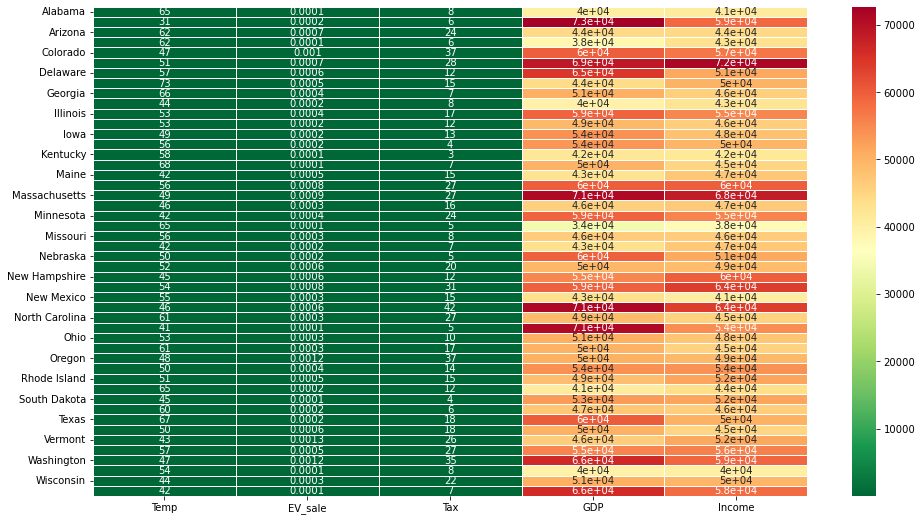

In [11]:
f, ax = plt.subplots(figsize=(16,9))
sns.heatmap(d_drop, cmap='RdYlGn_r', linewidths=0.5, annot=True)

### Draw Heatmap

In [12]:
def plot_heatmap(title, df_in,output_path,figsize=(6, 6)):
    df_corr = df_in.corr()
    # create a color palettte
    cmap = sns.diverging_palette(230, 10, as_cmap=True)
    # display the heatmap
    f, ax = plt.subplots(figsize=figsize)
    sns_heatmap = sns.heatmap(df_corr, square=True, cbar=True, annot=True, cmap=cmap, linewidths=1, vmin=-1)
    ax.set_title(title)
    
    # Save as png image
    fig = sns_heatmap.get_figure()
    fig.savefig(output_path, format='png')

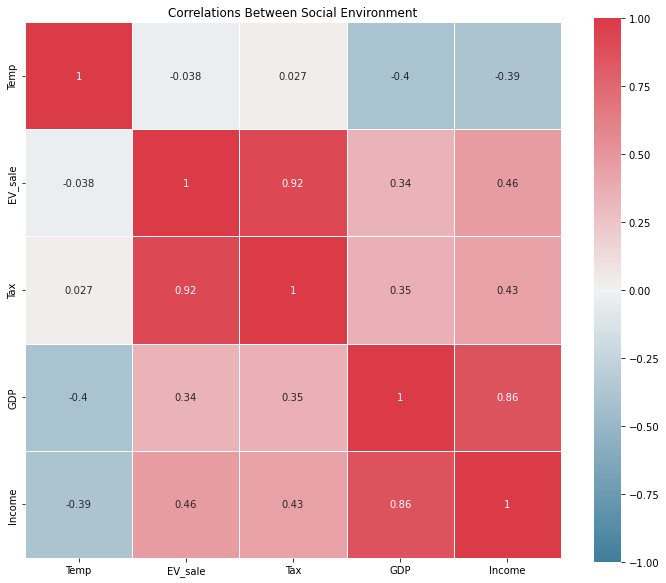

In [13]:
plot_heatmap("Correlations Between Social Environment", df_correlation,output_path='./Images/Correlation_Heatmap.png',figsize=(12,10))

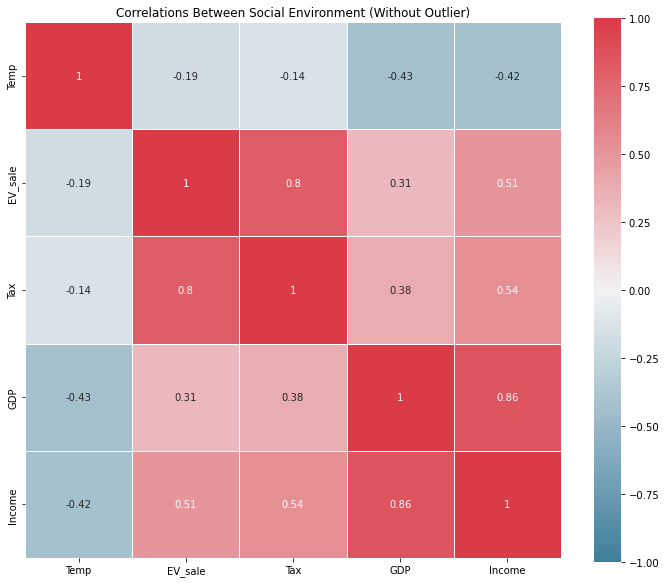

In [14]:
plot_heatmap("Correlations Between Social Environment (Without Outlier)", d_drop,output_path='./Images/Correlation_Heatmap_Without_Outlier.png',figsize=(12,10))

### Draw Scatter Matrix

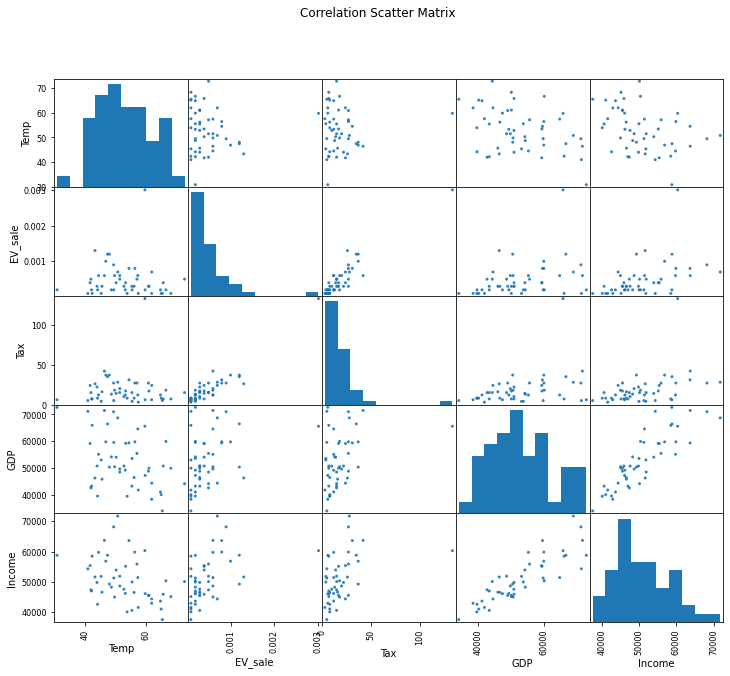

In [15]:
def plot_ScatterMatrix(title, df_in,output_path,figsize=(6, 6)):
    # display the heatmap
    scatter_matrix(df_in, figsize=figsize, alpha=0.9)
    plt.suptitle(title)
    # Save as png image
    plt.savefig(output_path, format='png')
    
plot_ScatterMatrix('Correlation Scatter Matrix',
                   df_correlation,
                   './Images/Correlation_Scatter_Matrix.png',
                   figsize=(12,10)
                  )

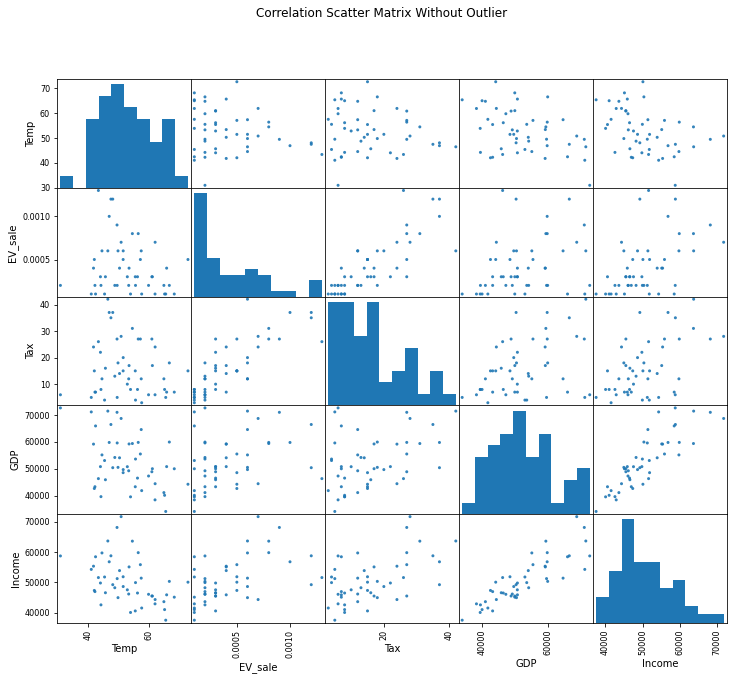

In [16]:
plot_ScatterMatrix('Correlation Scatter Matrix Without Outlier',
                   d_drop,
                   './Images/Correlation_Scatter_Matrix_Without_Outlier.png',
                   figsize=(12,10)
                  )

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

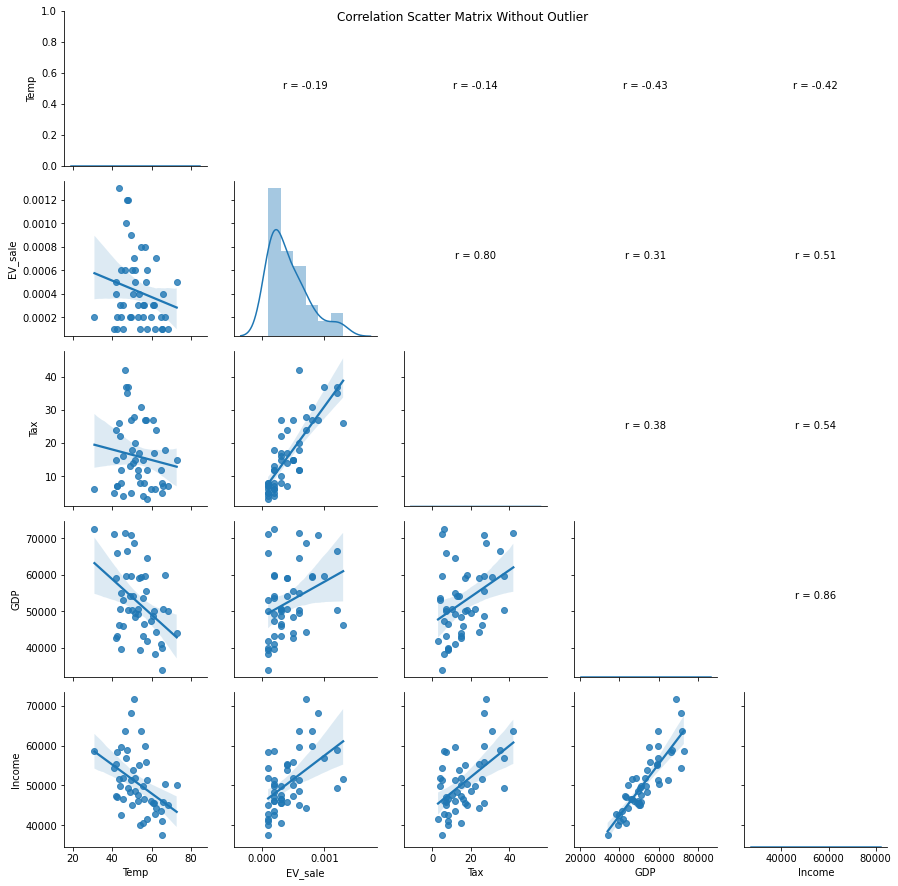

In [27]:
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()
    plt.suptitle('Correlation Scatter Matrix Without Outlier')
    plt.savefig('./Images/Correlation_Scatter_Matrix_withLine_Without_Outlier.png', format='png')

g = sns.PairGrid(d_drop)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)